In [11]:
# import all the necessary modules
import os
import rasterio
import numpy as np
%matplotlib inline
import xarray as xr
import rioxarray as rxr
from glob import glob
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [12]:
# define input path
data_path = "harvey"
pattern = "*B[5-6]*.TIF"
shp_path = r"harvey/aoi.shp"
path = os.path.join(data_path, pattern)
band_path = glob(path)
band_path

['harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B5.TIF',
 'harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B6.TIF']

In [15]:
# stacking and cropping the band

def open_clean_band(band_path, crop_layer=None):
    if crop_layer is not None:
        try:
            clip_bound = crop_layer.geometry
            cleaned_band = rxr.open_rasterio(band_path,
                                             masked=True).rio.clip(clip_bound,
                                                                   from_disk=True).squeeze()
        except Exception as err:
            print("Oops, I need a geodataframe object for this to work.")
            print(err)
    else:
        cleaned_band = rxr.open_rasterio(band_path,
                                         masked=True).squeeze()

    return cleaned_band

def process_bands(paths, crop_layer=None, stack=False):
    all_bands = []
    for i, aband in enumerate(paths):
        cleaned = open_clean_band(aband, crop_layer)
        cleaned["band"] = i+1
        all_bands.append(cleaned)

    if stack:
        print("I'm stacking your data now.")
        return xr.concat(all_bands, dim="band")
    else:
        print("Returning a list of xarray objects.")
        return all_bands


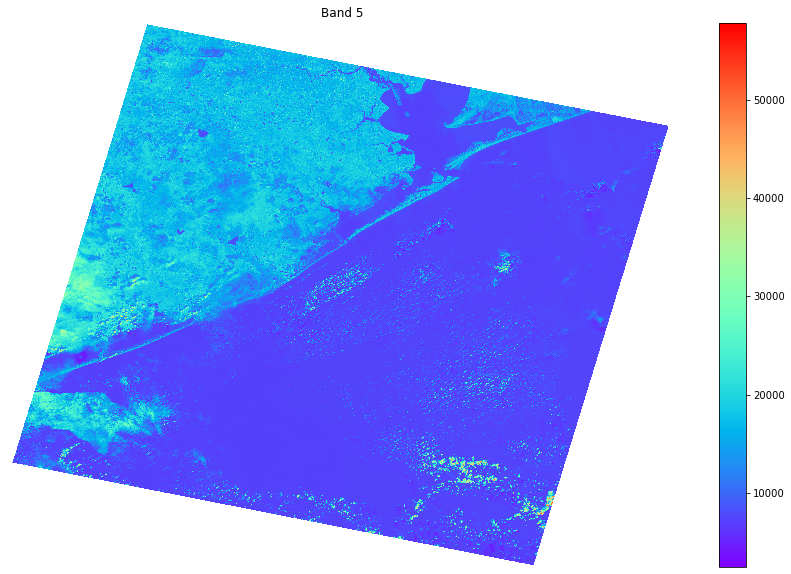

In [5]:
f, ax = plt.subplots(figsize = (15,10))
band_5.plot.imshow(cmap="rainbow",
                            ax=ax)
ax.set_title("Band 5")
ax.set_axis_off()
plt.show()


(-95.3157658688847, -94.38323033948106, 28.976792465134483, 29.621843881945885)

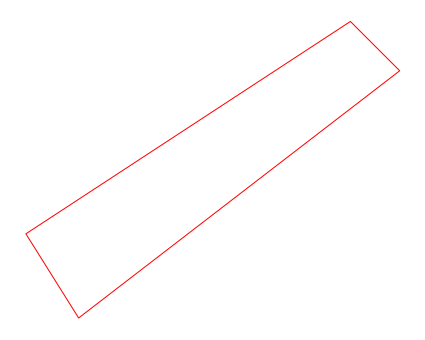

In [6]:
aoi = gpd.read_file(shp_path)
fig, ax = plt.subplots(1, figsize=(10,6))
aoi.plot(facecolor = 'None', edgecolor = 'Red', ax=ax)
ax.axis('off')

In [7]:
for data in band_path:
    landsat_crs = es.crs_check(data)
    print(landsat_crs)
    aoi_utm = aoi.to_crs(landsat_crs)


EPSG:32615
EPSG:32615


In [28]:
landsat_pre = process_bands(band_path, crop_layer=aoi_utm, stack=True)
landsat_pre

I'm stacking your data now.


<xarray.DataArray (band: 2, y: 2136, x: 2764)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 2.789e+05 2.789e+05 ... 3.618e+05 3.618e+05
  * y            (y) float64 3.275e+06 3.275e+06 ... 3.211e+06 3.211e+06
  * band         (band) int32 1 2
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [10]:
landsat_clip

<xarray.DataArray (y: 2136, x: 2764)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
Coordinates:
  * x            (x) float64 2.789e+05 2.789e+05 ... 3.618e+05 3.618e+05
  * y            (y) float64 3.275e+06 3.275e+06 ... 3.211e+06 3.211e+06
    band         int32 1
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     0

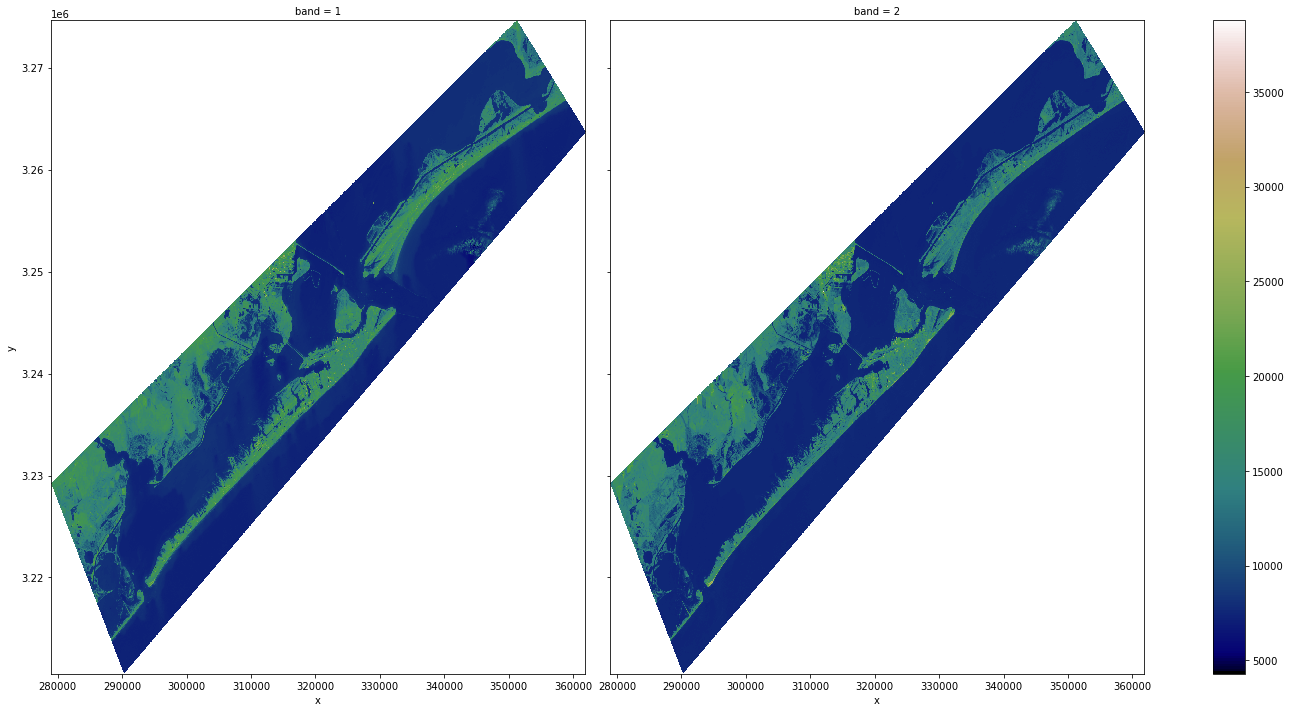

In [27]:
landsat_pre.plot.imshow(figsize=(20, 10), col="band",
                            col_wrap=2,
                            cmap="gist_earth")
ax.set_axis_off()

plt.show()